# Airline Fare Predictions

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import seaborn as sns


In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
train_data = pd.read_excel(r"/content/drive/MyDrive/Airline Fair prediction/Data_Train.xlsx")

In [49]:
train_data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [50]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [51]:
train_data.isnull().sum() 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [52]:
# shows very few missing values

In [53]:
train_data.shape

(10683, 11)

In [54]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [55]:
train_data.dropna(inplace = True)

In [56]:
train_data.isnull().sum() 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Preprocessing and perform featurization on "Date_of_Journey"

In [57]:
data = train_data.copy()

In [58]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [59]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [60]:
def change_into_datetime(col):
    data[col]=pd.to_datetime(data[col])

In [61]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [62]:
for feature in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
  change_into_datetime(feature)

In [63]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [64]:
data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [65]:
data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [66]:
data['journey_day'] = data['Date_of_Journey'].dt.day

In [67]:
data['journey_month'] = data['Date_of_Journey'].dt.month

In [68]:
data['journey_year'] = data['Date_of_Journey'].dt.year

In [69]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-08-08 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-08-08 05:50:00,2022-08-08 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-08-08 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-08-08 18:05:00,2022-08-08 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-08-08 16:50:00,2022-08-08 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [70]:
data.drop('Date_of_Journey', axis = 1, inplace =True)

In [71]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-08-08 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-08-08 05:50:00,2022-08-08 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


# Your Task :
    Doing Featurization using Map ,Lambda ,Custom function ,string splitting :
    
    Map ,Lambda -->> 
https://www.geeksforgeeks.org/python-map-function/
    
    How to write a function in Python -->> 
https://www.geeksforgeeks.org/python-functions/
    
    String splitting ->> 
https://www.programiz.com/python-programming/methods/string/split
    

# Clean Dep Time and Arrival Time and featurize it

In [72]:
def extract_hour_min(df,col):
  df[col + "_hour"] = df[col].dt.hour
  df[col + "_minute"] =df[col].dt.minute
  df.drop(col, axis = 1, inplace = True)
  return df.head(2)

In [73]:
extract_hour_min(data, 'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-08-08 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [74]:
extract_hour_min(data, 'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


# lets analyse when will most of the flights will take-off

In [77]:
def flight_dep_time(x):
  if (x>4) & (x<8):
    return 'Early Morning'

  elif (x>8) & (x<12):
    return 'Morning'

  elif (x>12) & (x<16):
    return 'Noon'
  
  elif (x>16) & (x<20):
    return 'Evening'

  elif (x>20) & (x<24):
    return 'Night'

  else:
    return 'Late Night'


In [78]:
data['Dep_Time_hour'].apply(flight_dep_time)

0                Night
1        Early Morning
2              Morning
3              Evening
4           Late Night
             ...      
10678          Evening
10679       Late Night
10680       Late Night
10681          Morning
10682          Morning
Name: Dep_Time_hour, Length: 10682, dtype: object

In [80]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts()

Late Night       2463
Early Morning    2183
Morning          2031
Evening          1706
Noon             1259
Night            1040
Name: Dep_Time_hour, dtype: int64

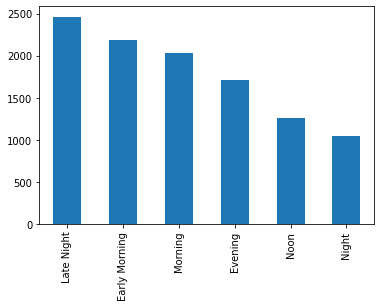

In [81]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind = "bar")

In [86]:
pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 3.1 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=ce51e58385174d123e875929f7fabc31bbce067df9def2538231151a472109dc
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


# lets use Cufflinks & plotly to make your visuals more interactive !

In [82]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [88]:
cf.go_offline()

In [89]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind = "bar")